In [3]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import gensim

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [4]:
#read the data set
conn=sqlite3.connect('final.sqlite')
final=pd.read_sql_query("""select * from Reviews""",conn)
conn.close()
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,cleaned_text_nonstem
0,93425,101582,B001BM368E,A2VFEY7LF1P0XC,claire,0,0,1,1328659200,Love this starter kit,We started our little guy on solid food with E...,start littl guy solid food earth best veggi lo...,started little guy solid food earths best vegg...
1,486287,525851,B0000BYDG9,A1T203AFVJI6UD,"Dee Flanagan ""beanie nut""",0,0,0,1261526400,"Less than useless, sorry I wasted my money!",I do not reccommend this product...Moths flew ...,not reccommend product moth flew right kept go...,not reccommend product moths flew right kept g...
2,403154,435932,B005YBGZG8,A3OKJGVP7U00A,Tman,0,0,1,1340064000,Pistachio addict...,"Hello, my name is Tom, and I'm a pistachio add...",hello name tom pistachio addict cant help exce...,hello name tom pistachio addict cant help exce...
3,270954,293709,B0007SNZP2,A1G6A8RNJYJ8BE,"WitzerAZ ""WitzerAZ""",0,0,1,1327708800,Karo Pancake Syrup-It's a southern thang!,I had received damaged bottles and had written...,receiv damag bottl written review complain top...,received damaged bottles written review compla...
4,345955,374254,B004HZI3GW,AQKQH3I5WLPFQ,H.T.S.,0,0,0,1347580800,gelatin is not an all natural ingredient,gelatin is not an all natural ingredient. for ...,gelatin not natur ingredi wish product like st...,gelatin not natural ingredient wish products l...


* Ignore the last column :- cleaned_text_nonstem(its just cleaned_text without stemming)

In [5]:
bow_vec=CountVectorizer()
bow=bow_vec.fit_transform(final['cleaned_text'])
bow.shape

(364171, 71691)

In [6]:
#sampling the dataset
X=bow[:2500,:].toarray()
Y=final.iloc[:2500,7].values
print(X[:5,:])
print(Y[:5])

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[1 0 1 1 0]


In [7]:
type(Y)

numpy.ndarray

In [8]:
type(X)

numpy.ndarray

In [9]:
s=StandardScaler()
X=s.fit_transform(X)
X[:5,:]

C:\Users\vipul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

* Now lets present dataset to the model in three different ways and observe the accuracy

## KNN

In [9]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.35,random_state=123)#testsize is 0<x<1

* Code to find value of k

In [ ]:
k_list=list(range(1,50,2))
acc_lst=[] #list of all the accuracies
for k in k_list:
    classifier=KNeighborsClassifier(n_neighbors=k) 
    classifier.fit(x_train,y_train) #fitting the model on every K
    y_pred=classifier.predict(x_test) #predicting the values
    acc_lst.append(accuracy_score(y_test,y_pred,normalize=True)*float(100)) #appending the accuracies of every k into the list


the optimal no. of neighbors is 5.


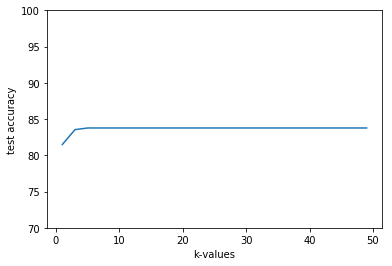

In [12]:
optimal_k=k_list[acc_lst.index(max(acc_lst))]
print('\nthe optimal no. of neighbors is %d.'% optimal_k)
plt.plot(k_list,acc_lst)
plt.xlabel('k-values')
plt.ylabel('test accuracy')
plt.ylim(70,100)
plt.show()

In [13]:
# fitting the model on train data (optimal K)
classifier=KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
# predicting 
y_pred=classt datsifier.predict(x_test)

**accuracy**

In [15]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
acc

83.771428571428572

## CV

In [8]:
#train-CV-test split
x_1,x_test,y_1,y_test=train_test_split(X,Y,test_size=0.35,random_state=123)
x_train,x_cv,y_train,y_cv=train_test_split(x_1,y_1,test_size=0.35,random_state=123)

* Function to find optimal k

In [ ]:
k_list=list(range(1,50,2))
acc_list=[]
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_cv)
    acc_list.append(accuracy_score(y_cv,y_pred,normalize=True)*float(100))

optimal_k=k_list[acc_list.index(max(acc_list))]

the optimal value of k is 3


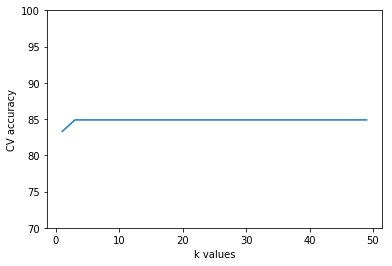

In [11]:
print('the optimal value of k is %d'% optimal_k)
plt.plot(k_list,acc_list)
plt.xlabel("k values")
plt.ylabel("CV accuracy")
plt.ylim(70,100)
plt.show()

In [12]:
classifier=KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
y_pred=classifier.predict(x_test)

In [14]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
acc

83.542857142857144

## K-fold

In [10]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=123)

* Function to find k

the optimal value of k is 5 


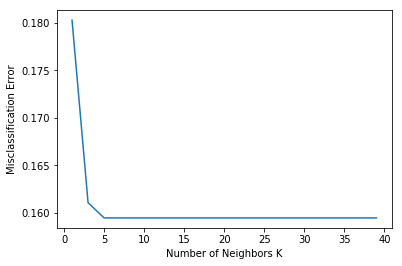

In [14]:
neighbors=list(range(1,40,2))
cv_score=[]

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=6,scoring='accuracy')#Hyper parameter-CV
    cv_score.append(score.mean())
    
MSE=[1-x for x in cv_score]

optimal_k=neighbors[MSE.index(min(MSE))]
print('the optimal value of k is %d '% optimal_k)
plt.plot(neighbors,MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [15]:
classifier=KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred=classifier.predict(x_test)

In [18]:
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
acc

81.920000000000002

 ## Accuracies :- 
               1) knn - 83.7%
               2) CV  - 83.5%
               3) kfold- 81.9%